# Expenditure Analysis
In this notebook I analyze my personal expense data. The analysis can broadly be divided into three parts:
1. **Expenses**: I look at categorical expense, recurring expenses and impulsive expenses. I also look at the distribution of expenses over time.
2. **Cashflow**: I look at the distribution of personal cashflow over time.
3. **Budget**: [WIP] I analyze my previous budget estimates and how well I have been able to stick to them. I also would like to see if I can predict the future expenses based on the past data. It will help me in setting up a budget for the future.

In [1]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Expenses

### Introduction
- In this section, I will analyze individual expenses
- Some expenses are impulsive and can be avoided. I will try to identify such expenses and see if I can reduce them.

In [2]:
df = pd.read_csv('../data/expenses.csv')

### Data
- I maintain an excel sheet to track my expenses. I have combined all expenses in a single csv file
### Data Preparation
- I have a csv file with my expense data. I will load the data and do some basic data cleaning.
- I will rename some expenses to make them more easy to aggregate later
### Note:
- The expenses before December 2023 is not tracked in the same format. They are categorized  as `other` and named `expense`

In [3]:
# clean text columns
df['Category'] = df['Category'].str.lower().str.strip()
df['Name'] = df['Name'].str.lower().str.strip()

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# convert category column to category type
df['Category'] = df['Category'].astype('category')

# create year and month columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# replace nan category with 'other'
df['Category'] = df['Category'].cat.add_categories('other').fillna('other')

# replace with common names
df['Name'] = df['Name'].replace('gummies', 'canna cabana')
df['Name'] = df['Name'].replace('coffee', 'tim hortons')
df['Name'] = df['Name'].replace('tim horton', 'tim hortons')
df['Name'] = df['Name'].replace('tim horton\'s', 'tim hortons')
df['Name'] = df['Name'].replace('common grocery', 'common groceries')
df['Name'] = df['Name'].replace('phone', 'fido')
df['Name'] = df['Name'].replace('save on', 'groceries')

# replace category of name linkedin premium to personal
df.loc[df['Name'] == 'linkedin premium', 'Category'] = 'personal'

# add bills in october
new_rows = pd.DataFrame({'Date': ['2023-10-01', '2023-10-01'], 'Name': ['rent', 'fido'], 'Amt': [800, 45], 'Category': ['bill', 'bill']})
df = pd.concat([df, new_rows], ignore_index=True)
# convert category column to category type
df['Category'] = df['Category'].astype('category')
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# create year and month columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

C:\Users\ruchi\AppData\Local\Temp\ipykernel_26424\2422096272.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_expense = df.groupby(['Year', 'Month', 'Category'])['Amt'].sum().unstack()


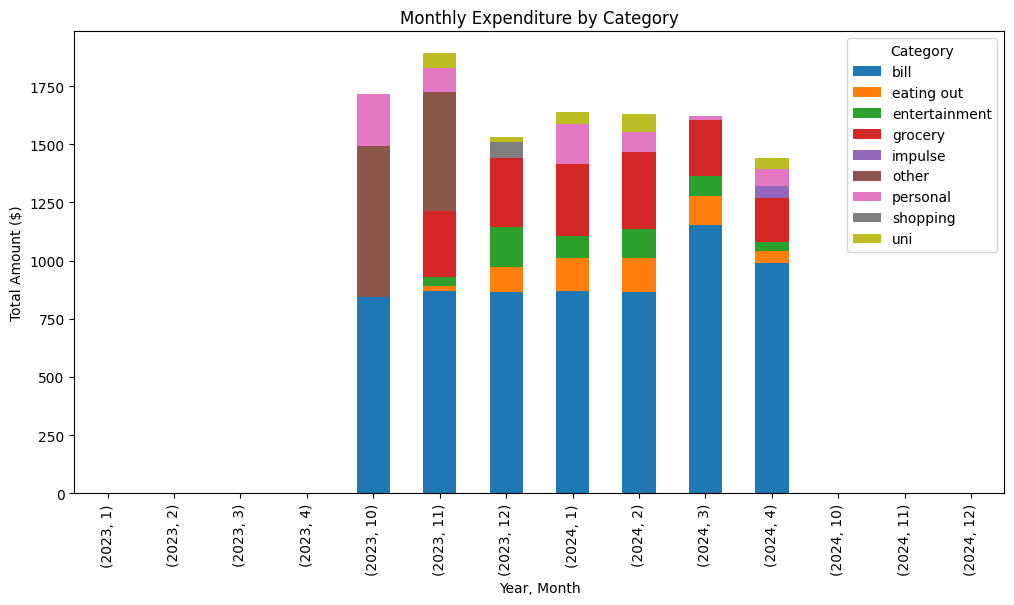

In [4]:
# monthly expenditure by category
monthly_expense = df.groupby(['Year', 'Month', 'Category'])['Amt'].sum().unstack()
monthly_expense.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Expenditure by Category')
plt.xlabel('Year, Month')
plt.ylabel('Total Amount ($)')
plt.show()

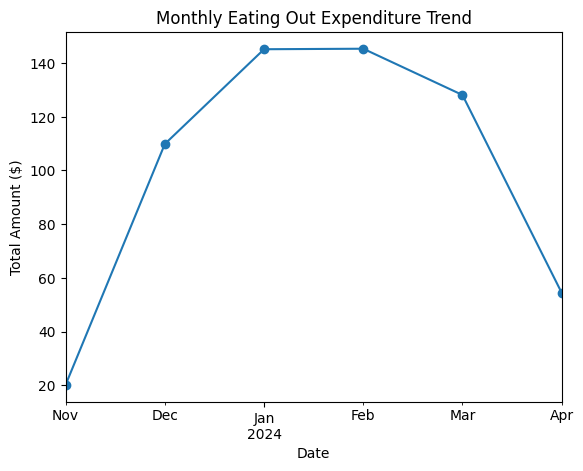

In [5]:
# how did my eating out expenditure change over time
eating_out = df[df['Category'] == 'eating out']
eating_out.set_index('Date').resample('ME')['Amt'].sum().plot(marker='o')
plt.title('Monthly Eating Out Expenditure Trend')
plt.xlabel('Date')
plt.ylabel('Total Amount ($)')
plt.show()

In [6]:
# average monthly expenditure
avg_monthly_exp = df.set_index('Date').resample('ME')['Amt'].sum().mean()
print(f'Average monthly expenditure: ${avg_monthly_exp:.2f}')

Average monthly expenditure: $1638.85


### Tim Hortons:

In [7]:
# how many times did i go to tim hortons
print(f'Number of times I went to Tim Hortons: {df[df["Name"] == "tim hortons"].shape[0]}')

Number of times I went to Tim Hortons: 14


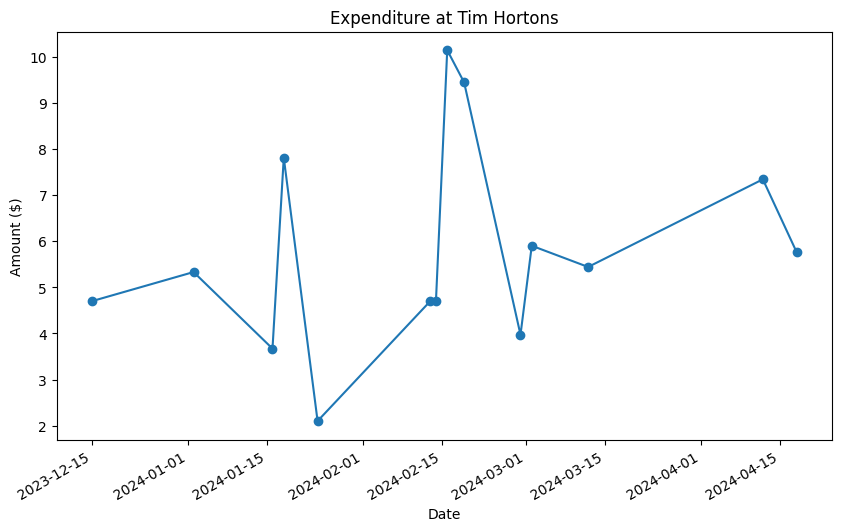

In [8]:
# visualize my each time's expenditure at tim hortons
plt.figure(figsize=(10, 6))
df[df['Name'] == 'tim hortons'].set_index('Date')['Amt'].plot(marker='o')
plt.title('Expenditure at Tim Hortons')
plt.xlabel('Date')
plt.ylabel('Amount ($)')
plt.show()

In [9]:
# show the averages for tim hortons
avg_amt = df[df['Name'] == 'tim hortons']['Amt'].mean()
avg_amt.round(2)

5.79

### Vape:

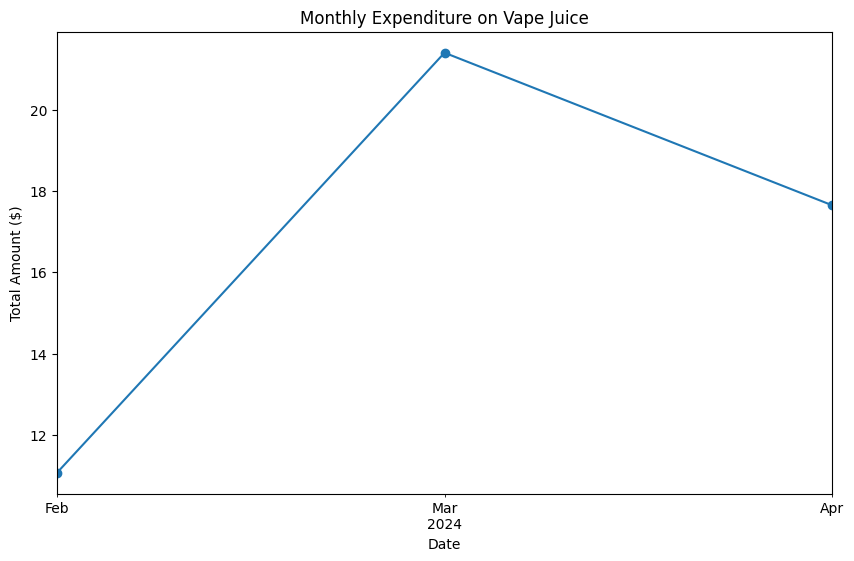

In [10]:
# visualize vape juice expenditure over time
plt.figure(figsize=(10, 6))
df[df['Name'] == 'vape juice'].set_index('Date').resample('ME')['Amt'].sum().plot(marker='o')
plt.title('Monthly Expenditure on Vape Juice')
plt.xlabel('Date')
plt.ylabel('Total Amount ($)')
plt.show()

In [11]:
# when did i purchase vape in 2023
df[(df['Name'] == 'vape') & (df['Year'] == 2023)]

,Name,Category,Amt,Date,Year,Month
159,vape,entertainment,7.0,2023-12-15,2023,12


### FIDO

In [12]:
# what is my average fido bill per month
df_fido = df[df['Name'] == 'fido']
avg_fido = df_fido.set_index('Date').resample('ME')['Amt'].sum().mean()
avg_fido.round(2)

46.57

### Canna Cabana

In [13]:
# how many times did i go to canna cabana
print(f'Number of times I went to Canna Cabana: {df[df["Name"] == "canna cabana"].shape[0]}')

Number of times I went to Canna Cabana: 9


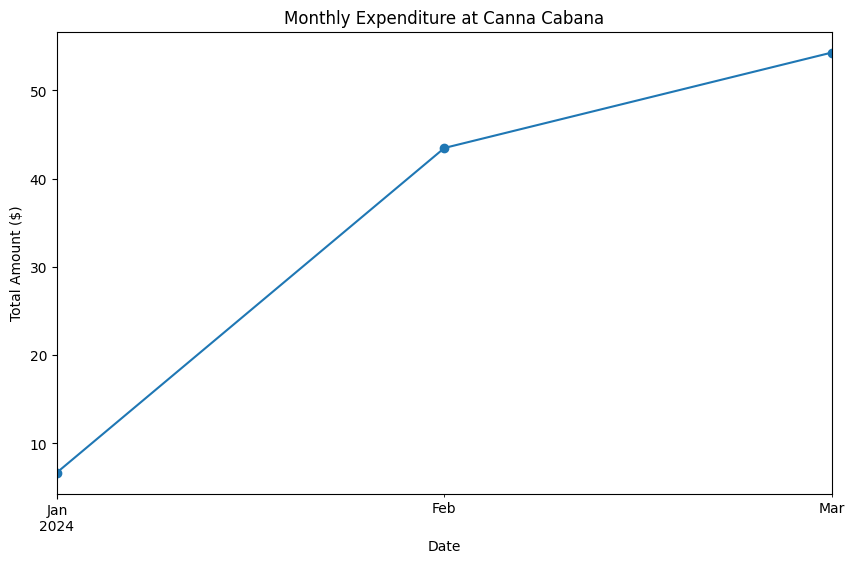

In [14]:
# visualize expenditure at canna cabana over time
plt.figure(figsize=(10, 6))
df[df['Name'] == 'canna cabana'].set_index('Date').resample('ME')['Amt'].sum().plot(marker='o')
plt.title('Monthly Expenditure at Canna Cabana')
plt.xlabel('Date')
plt.ylabel('Total Amount ($)')
plt.show()

In [15]:
# what is my total overall expenditure
total_exp = df['Amt'].sum()
total_exp

11471.92

In [16]:
# display all rows of df
pd.set_option('display.max_rows', None)
# rank the name of expenditures by frequency and amount
ranked_names = df['Name'].value_counts().to_frame('Frequency')
ranked_names['Total Amount'] = df.groupby('Name')['Amt'].sum()
ranked_names['Average Amount'] = df.groupby('Name')['Amt'].mean().round(2)
ranked_names = ranked_names.sort_values(by='Total Amount', ascending=False)
ranked_names

,Frequency,Total Amount,Average Amount
Name,,,
rent,7,5680.00,811.43
expense,27,1159.75,42.95
groceries,20,826.41,41.32
bc msp,2,375.00,187.50
fido,7,326.00,46.57
jacket,1,220.62,220.62
w3 groceries,3,219.18,73.06
w1 groceries,1,183.96,183.96
w4 groceries,3,172.29,57.43


In [17]:
# analyze the amt column
df['Amt'].describe()

count    218.000000
mean      52.623486
std      147.358576
min        0.770000
25%        5.335000
50%       11.000000
75%       38.045000
max      820.000000
Name: Amt, dtype: float64

In [18]:
# for further analysis, remove bills
df_no_bill = df[df['Category'] != 'bill']

In [19]:
# analyze the amt column
df_no_bill['Amt'].describe()

count    200.000000
mean      25.097950
std       48.320144
min        0.770000
25%        5.112500
50%       10.005000
75%       30.850000
max      510.370000
Name: Amt, dtype: float64

In [20]:
# list expenditure greater than 100
df_no_bill[df_no_bill['Amt'] > 100]

,Name,Category,Amt,Date,Year,Month
99,w1 groceries,grocery,183.96,2024-02-03,2024,2
179,groceries,grocery,286.35,2023-11-30,2023,11
187,expense,other,510.37,2023-11-20,2023,11
215,jacket,personal,220.62,2023-10-30,2023,10


In [21]:
# expenditures between 50 and 100
df_no_bill[(df_no_bill['Amt'] >= 50) & (df_no_bill['Amt'] <= 100)]

,Name,Category,Amt,Date,Year,Month
6,tax walk in,personal,67.20,2024-04-28,2024,4
13,groceries,grocery,76.12,2024-04-18,2024,4
40,w3 groceries,grocery,93.85,2024-03-18,2024,3
49,groceries,grocery,57.20,2024-03-11,2024,3
65,basc 523 course pack,uni,76.57,2024-02-29,2024,2
66,w4 groceries,grocery,72.15,2024-02-29,2024,2
82,w3 groceries,grocery,70.86,2024-02-16,2024,2
90,linkedin premium,personal,53.32,2024-02-13,2024,2
104,earphones,personal,99.58,2024-01-30,2024,1
111,craft,eating out,99.32,2024-01-27,2024,1


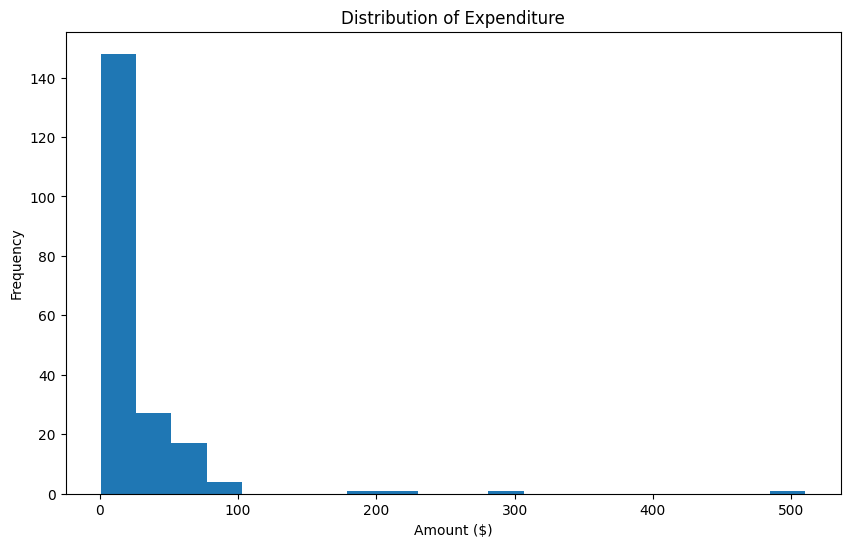

In [22]:
# plot the distribution of expenditures
plt.figure(figsize=(10, 6))
df_no_bill['Amt'].plot(kind='hist', bins=20)
plt.title('Distribution of Expenditure')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.show()

In [23]:
# analyze expenditures between 0 and 75
df1 = df_no_bill[(df_no_bill['Amt'] >= 0) & (df_no_bill['Amt'] <= 75)]

In [24]:
# how frequently do i spend between 0 and 75 (pct)
round(df1['Amt'].value_counts().sum()/df['Amt'].value_counts().sum()*100,2)

87.16

C:\Users\ruchi\AppData\Local\Temp\ipykernel_26424\1293071481.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_bill['outlier'] = df_no_bill.apply(lambda row: is_outlier(row, q1, q3, iqr), axis=1)


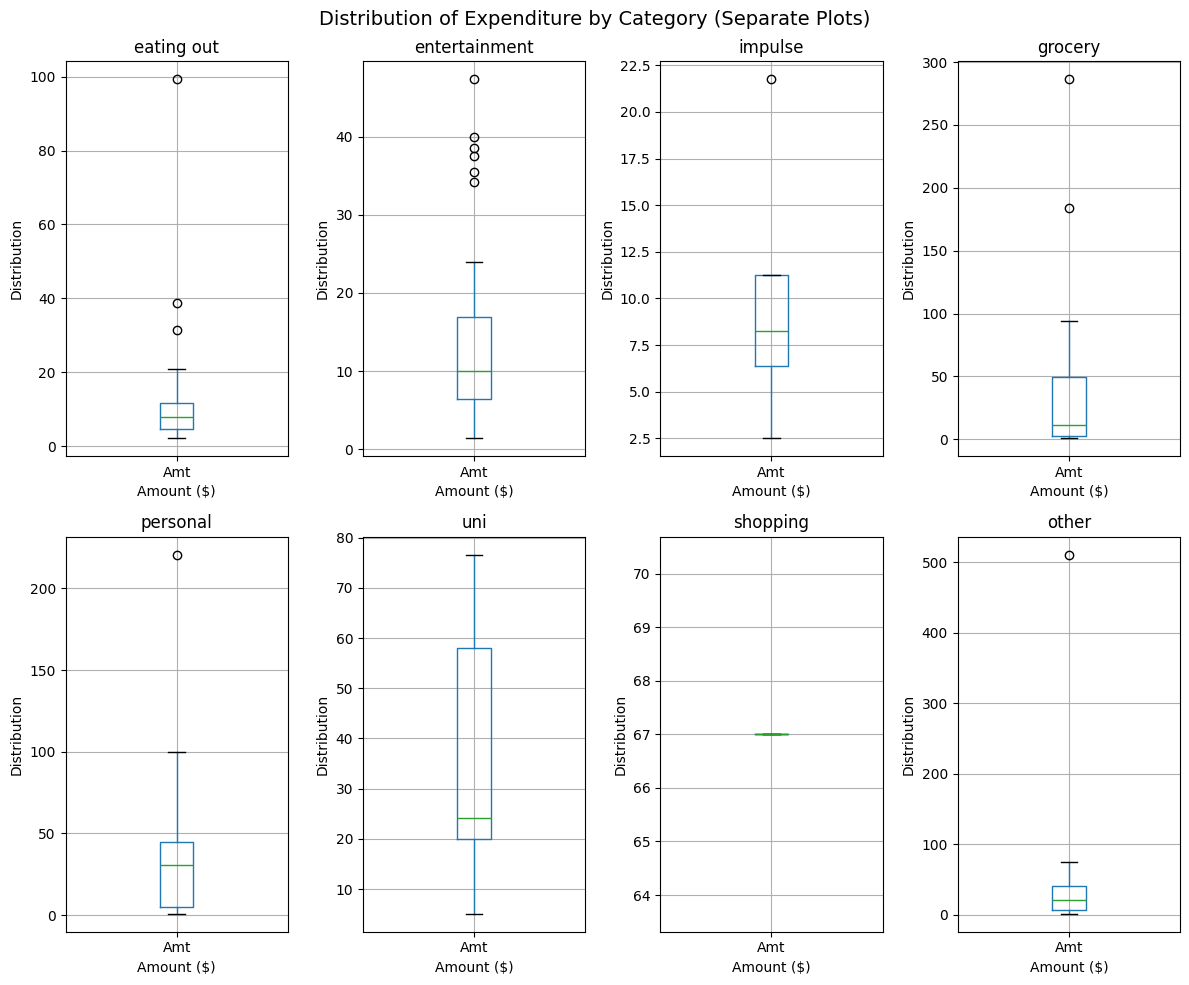

Outlier data by category:
eating out: {'craft': 99.32}
grocery: {'groceries': 286.35, 'w3 groceries': 70.86, 'w4 groceries': 72.15, 'w1 groceries': 183.96, 'w2 grocery': 88.47}
personal: {'earphones': 99.58, 'jacket': 220.62}
uni: {'basc 523 course pack': 76.57}
other: {'expense': 74.83}


In [25]:
# Calculate the number of categories and rows for subplots
categories = df_no_bill['Category'].unique()
category_count = len(categories)
rows = (category_count + 3) // 4  # Adjust divisor for desired layout

# Create a new figure with subplots
fig, axes = plt.subplots(nrows=rows, ncols=4, figsize=(12, 10))  # Adjust figsize as needed


# **Outlier Identification**

def is_outlier(row, q1, q3, iqr):
    return (row['Amt'] < (q1 - 1.5 * iqr)) or (row['Amt'] > (q3 + 1.5 * iqr))

# Calculate quartiles and IQR (optional, uncomment if not using pandas)
# q1 = df_no_bill['Amt'].quantile(0.25)
# q3 = df_no_bill['Amt'].quantile(0.75)
# iqr = q3 - q1

# Use pandas IQR function (recommended)
iqr = stats.iqr(df_no_bill['Amt'])
q1 = df_no_bill['Amt'].quantile(0.25)
q3 = df_no_bill['Amt'].quantile(0.75)

df_no_bill['outlier'] = df_no_bill.apply(lambda row: is_outlier(row, q1, q3, iqr), axis=1)


# Iterate through categories and plot boxplots
outlier_data = {}  # Dictionary to store category-wise outlier info
for i in range(category_count):
    row = i // 4
    col = i % 4
    current_category = categories[i]

    # Filter data for the current category
    category_data = df_no_bill[df_no_bill['Category'] == current_category]

    # Create the boxplot on the current subplot
    category_data.boxplot(column='Amt', ax=axes[row, col])

    # Customize subplot labels and title
    axes[row, col].set_title(current_category)
    axes[row, col].set_xlabel('Amount ($)')
    axes[row, col].set_ylabel('Distribution')

    # Collect outlier data for this category
    outliers = category_data[category_data['outlier']]
    if not outliers.empty:
        outlier_dict = {name: amt for name, amt in zip(outliers['Name'], outliers['Amt'])}
        outlier_data[current_category] = outlier_dict

# Remove unused subplots for a clean layout (if necessary)
if category_count < rows * 4:
    for i in range(category_count, rows * 4):
        row = i // 4
        col = i % 4
        fig.delaxes(axes[row, col])


# Adjust main plot title and display
fig.suptitle('Distribution of Expenditure by Category (Separate Plots)', fontsize=14)
plt.tight_layout()
plt.show()

# Print outlier data as dictionaries
if outlier_data:
    print("Outlier data by category:")
    for category, outliers in outlier_data.items():
        print(f"{category}: {outliers}")

In [26]:
# what is my overall expenditure on tim hortons, canna cabana, any vape related names
total_vape = df[df['Name'].str.contains('vape')]['Amt'].sum()
total_tim_hortons = df[df['Name'] == 'tim hortons']['Amt'].sum()
total_canna_cabana = df[df['Name'] == 'canna cabana']['Amt'].sum()
round(np.array([total_vape, total_tim_hortons, total_canna_cabana]).sum(),2)

273.6

## Cashflow

### Introduction
- In this section, I will analyze my personal cashflow
- I have added income manually to `Debit` column
- I will try to answer whether my expenses are sustainable at the current income level

In [27]:
def book_entry(df, date, credit, debit):
    new_row = pd.DataFrame({'Date': [date], 'Credit': [credit], 'Debit': [debit]})
    return pd.concat([df, new_row], ignore_index=True)

In [28]:
cashflow = df.set_index('Date').resample('ME')['Amt'].sum().reset_index()

# I have a monthly income of $ 730. Create a cashflow dataframe with the current df
monthly_income = 730
cashflow['Debit'] = monthly_income

# rename amt column to credit
cashflow.rename(columns={'Amt': 'Credit'}, inplace=True)

# Add ICICI transfer debit
cashflow = book_entry(cashflow, '2024-04-30', 0, 766)
cashflow = book_entry(cashflow, '2024-03-26', 0, 462)
cashflow = book_entry(cashflow, '2024-01-29', 0, 969.02)
cashflow = book_entry(cashflow, '2023-10-16', 0, 2412)

# Add GIC debit
cashflow = book_entry(cashflow, '2023-09-30', 0, 730)
cashflow = book_entry(cashflow, '2023-08-31', 0, 2000)
# Add CAD cash debit
cashflow = book_entry(cashflow, '2023-08-31', 0, 2000)
# Add fx card debit
cashflow = book_entry(cashflow, '2023-08-31', 0, 1000)

# Add August and September credit (rough estimate)
cashflow = book_entry(cashflow, '2023-08-31', 2500, 0)
cashflow = book_entry(cashflow, '2023-09-30', round(avg_monthly_exp,2), 0)

# April 2024 credit estimate
cashflow = book_entry(cashflow, '2024-04-30', 1700, 0)
cashflow = book_entry(cashflow, '2024-04-30', 0, 730)

# Convert Date column to datetime
cashflow.Date = pd.to_datetime(cashflow.Date)

# balance = debit - credit
cashflow['Balance'] = cashflow['Debit'] - cashflow['Credit']

# consolidate the cashflow dataframe by month
cashflow = cashflow.set_index('Date').resample('ME').sum().reset_index()

cashflow = cashflow.sort_values(by='Date')

In [29]:
# create a column which shows the cumulative balance
cashflow['Cumulative Balance'] = cashflow['Balance'].cumsum()

In [30]:
cashflow

,Date,Credit,Debit,Balance,Cumulative Balance
0,2023-08-31,2500.00,5000.00,2500.00,2500.00
1,2023-09-30,1638.85,730.00,-908.85,1591.15
2,2023-10-31,1715.00,3142.00,1427.00,3018.15
3,2023-11-30,1890.74,730.00,-1160.74,1857.41
4,2023-12-31,1530.90,730.00,-800.90,1056.51
5,2024-01-31,1640.04,1699.02,58.98,1115.49
6,2024-02-29,1630.30,730.00,-900.30,215.19
7,2024-03-31,1623.31,1192.00,-431.31,-216.12
8,2024-04-30,3141.63,2226.00,-915.63,-1131.75


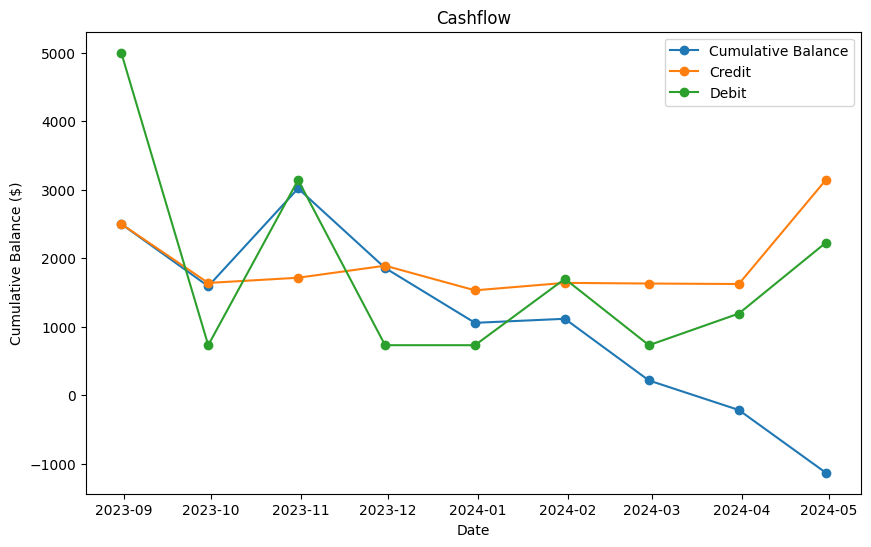

In [31]:
# visualize the cashflow
plt.figure(figsize=(10, 6))
plt.plot(cashflow['Date'], cashflow['Cumulative Balance'], marker='o', label='Cumulative Balance')
plt.plot(cashflow['Date'], cashflow['Credit'], marker='o', label='Credit')
plt.plot(cashflow['Date'], cashflow['Debit'], marker='o', label='Debit')
plt.title('Cashflow')
plt.xlabel('Date')
plt.ylabel('Cumulative Balance ($)')
plt.legend()
plt.show()

In [32]:
# analyse the cashflow
cashflow.describe()

,Date,Credit,Debit,Balance,Cumulative Balance
count,9,9.000000,9.000000,9.000000,9.000000
mean,2023-12-30 16:00:00,1923.418889,1797.668889,-125.750000,1111.781111
min,2023-08-31 00:00:00,1530.900000,730.000000,-1160.740000,-1131.750000
25%,2023-10-31 00:00:00,1630.300000,730.000000,-908.850000,215.190000
50%,2023-12-31 00:00:00,1640.040000,1192.000000,-800.900000,1115.490000
75%,2024-02-29 00:00:00,1890.740000,2226.000000,58.980000,1857.410000
max,2024-04-30 00:00:00,3141.630000,5000.000000,2500.000000,3018.150000
std,NaN,542.255542,1465.514076,1264.772868,1320.551422


In [33]:
# what is my expenditure over weeks across months
# df_no_bill.set_index('Date').resample('W')['Amt'].sum().plot(marker='o')

# what is the average expenditure in a 4 week month
weekly_avg_exp = df_no_bill.set_index('Date').resample('W')['Amt'].sum().mean()
weekly_avg_exp*4

743.642962962963

## Budget

### Introduction
- In this section, I will judge my historic budget expenses
- I will inform my future budget based on the past trend

In [34]:
budget = pd.read_csv('../data/budgets.csv')

In [35]:
# lowercase column names
category_names = budget.columns[2:].tolist()

# melt the dataframe
budget = budget.melt(id_vars=['Year', 'Month'], value_vars=category_names, var_name='Category', value_name='Budget')
# lowercase category column
budget['Category'] = budget['Category'].str.lower().str.strip()

In [36]:
# merge the budget dataframe with the expenses dataframe
df_merged = pd.merge(budget, df, on=['Year', 'Month', 'Category'], how='left')

In [37]:
# Assuming df_merged is your DataFrame containing expense data
# Step 1: Drop rows with missing values in necessary columns
df_merged.dropna(subset=['Category', 'Month', 'Amt'], inplace=True)

# Step 3: Aggregate Expenses by Category and Month
expenses_by_month_category = df_merged.groupby(['Year', 'Month', 'Category','Budget'])['Amt'].sum().reset_index()


In [38]:
# Step 4: Compare Total Expenses with Monthly Budget
budget_vs_expenses = expenses_by_month_category.groupby(['Year', 'Month', 'Category']).agg(
    Total_Expenses=('Amt', 'sum'),
    Monthly_Budget=('Budget', 'first')
).reset_index()

# Now you can use 'expenses_by_month_category' and 'budget_vs_expenses' for further analysis.

In [39]:
# which category have the highest deviation from budget
budget_vs_expenses['Deviation'] = budget_vs_expenses['Total_Expenses'] - budget_vs_expenses['Monthly_Budget']
budget_vs_expenses['Deviation_pct'] = (budget_vs_expenses['Deviation'] / budget_vs_expenses['Monthly_Budget']) * 100

# Find the category with the highest deviation
category_max_deviation = budget_vs_expenses.loc[budget_vs_expenses['Deviation_pct'].idxmax()]

In [40]:
budget_vs_expenses

,Year,Month,Category,Total_Expenses,Monthly_Budget,Deviation,Deviation_pct
0,2023,12,bill,864.80,870,-5.20,-0.597701
1,2023,12,eating out,109.84,100,9.84,9.840000
2,2023,12,entertainment,171.78,100,71.78,71.780000
3,2023,12,grocery,296.64,400,-103.36,-25.840000
4,2023,12,uni,20.84,0,20.84,inf
5,2024,1,bill,867.88,870,-2.12,-0.243678
6,2024,1,eating out,145.12,80,65.12,81.400000
7,2024,1,entertainment,92.13,80,12.13,15.162500
8,2024,1,grocery,308.71,400,-91.29,-22.822500
9,2024,1,personal,172.88,25,147.88,591.520000


In [41]:
# add a date column using year and month
budget_vs_expenses['Date'] = pd.to_datetime(budget_vs_expenses[['Year', 'Month']].assign(DAY=1))

In [42]:
# what is the total deviation by categories
total_deviation = budget_vs_expenses.groupby('Category')['Deviation'].sum()
total_deviation

Category
bill             182.33
eating out       242.79
entertainment    181.01
grocery         -549.81
impulse           50.13
personal         248.84
uni              108.89
Name: Deviation, dtype: float64

In [43]:
# what is the total deviation percentage by categories
total_deviation_pct = budget_vs_expenses.groupby('Category')['Deviation_pct'].sum()
total_deviation_pct

Category
bill              19.247888
eating out       410.504167
entertainment    280.170278
grocery         -145.513125
impulse                 inf
personal         995.360000
uni                     inf
Name: Deviation_pct, dtype: float64

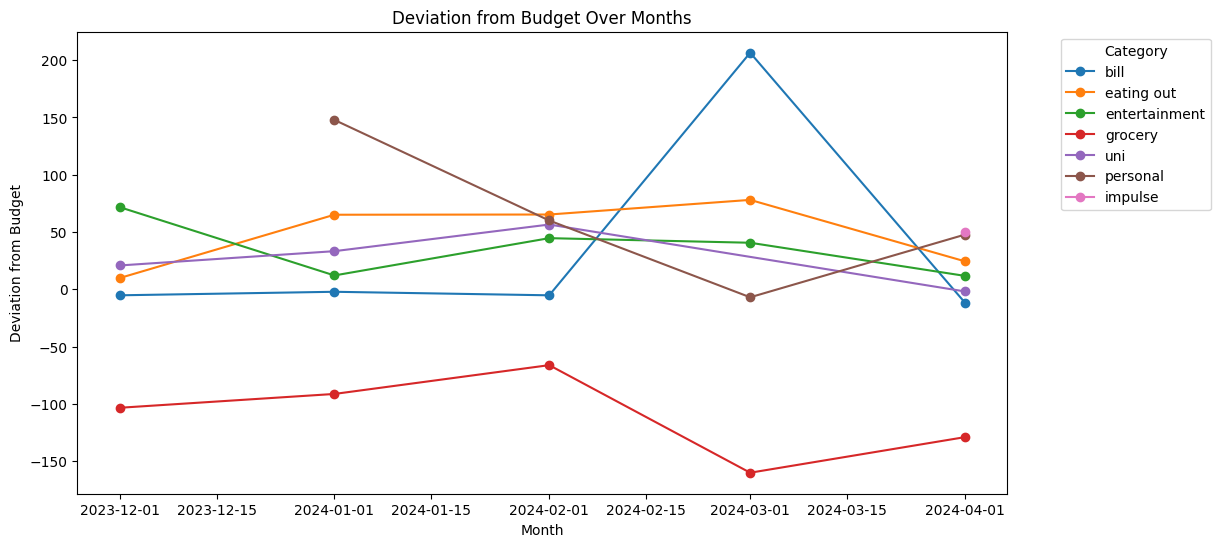

In [44]:
# Visualize the deviation from budget over months
plt.figure(figsize=(12, 6))
for category in budget_vs_expenses['Category'].unique():
    category_data = budget_vs_expenses[budget_vs_expenses['Category'] == category]
    plt.plot(category_data['Date'], category_data['Deviation'], marker='o', label=category)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Deviation from Budget')
plt.title('Deviation from Budget Over Months')

# Add legends
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()


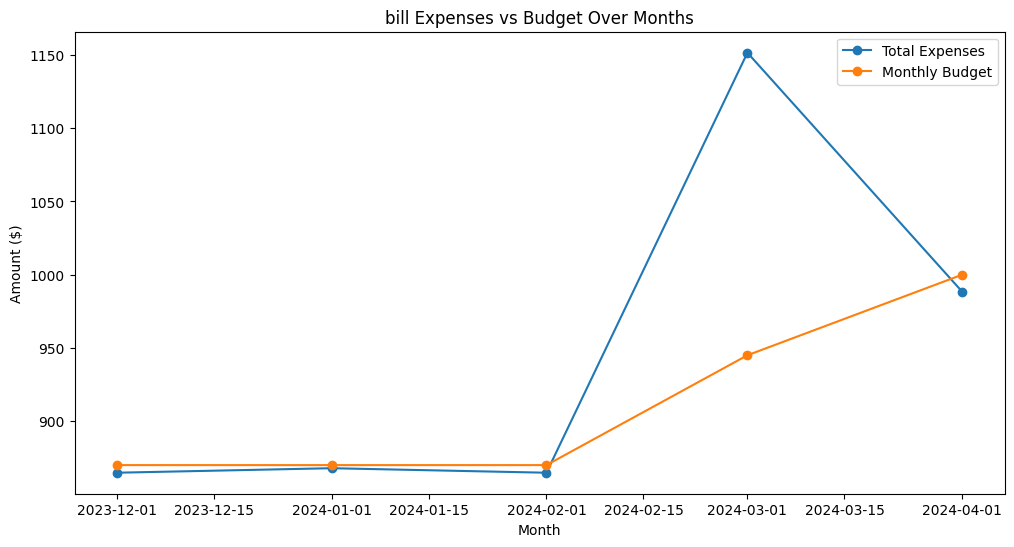

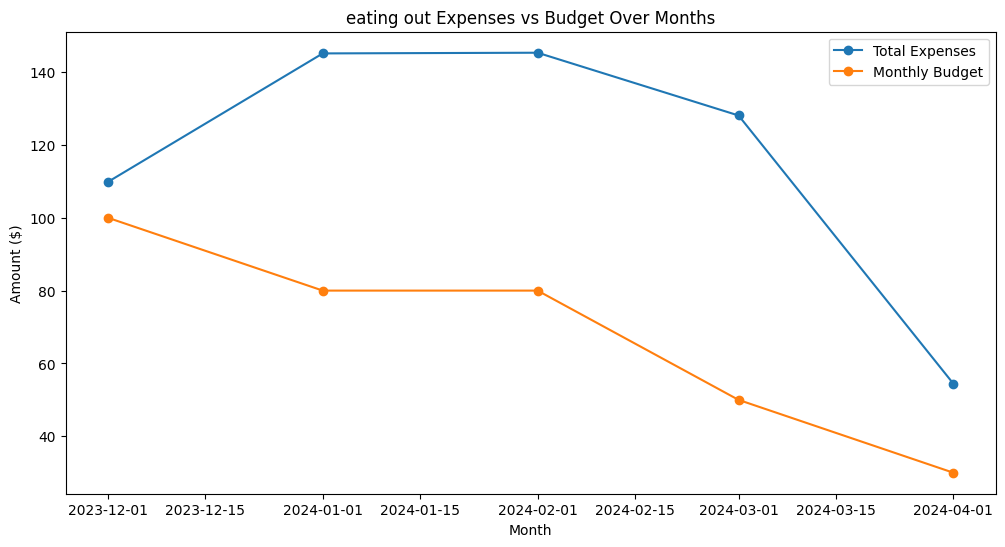

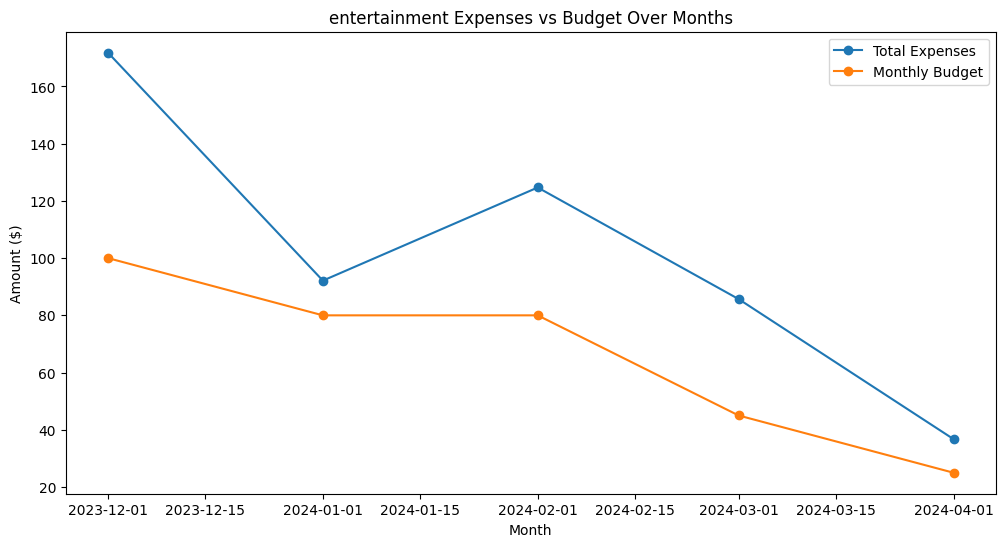

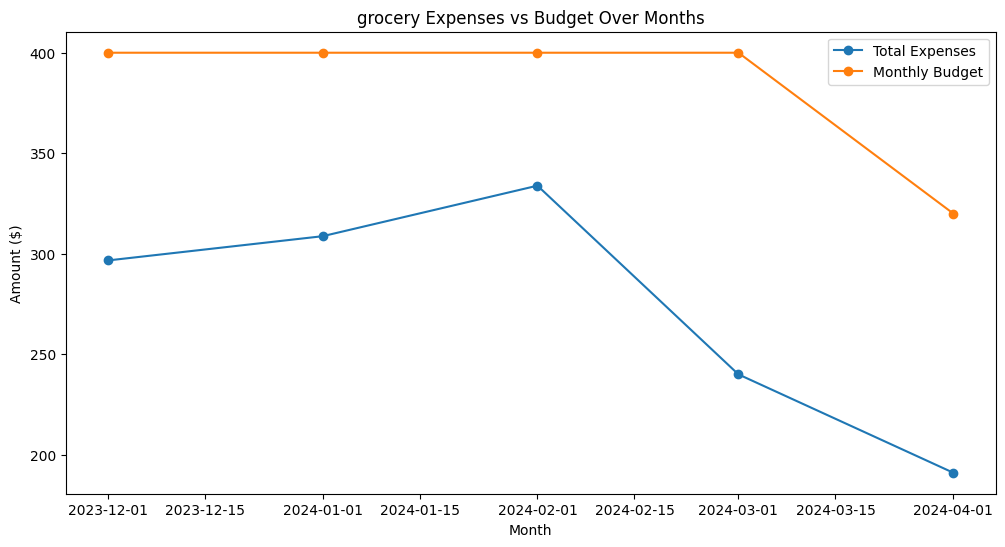

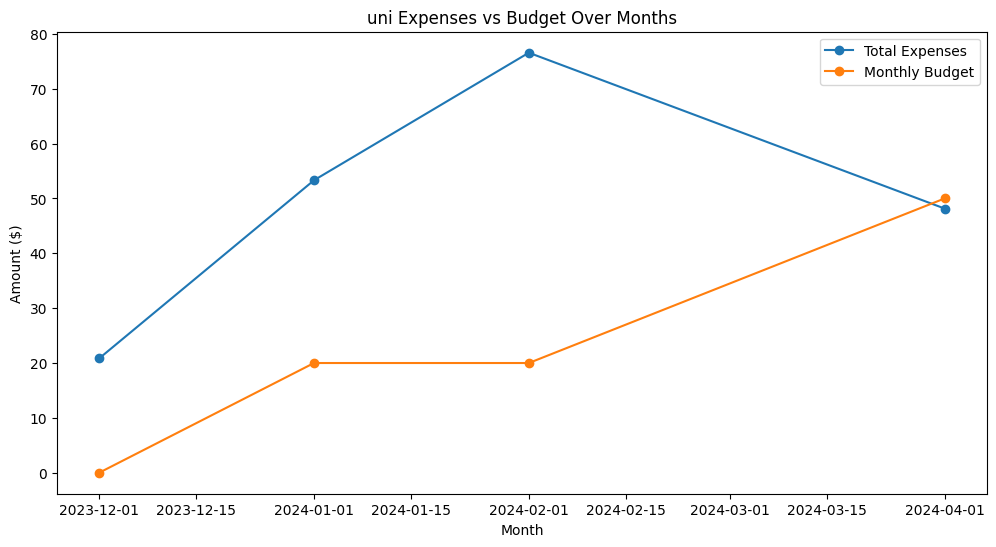

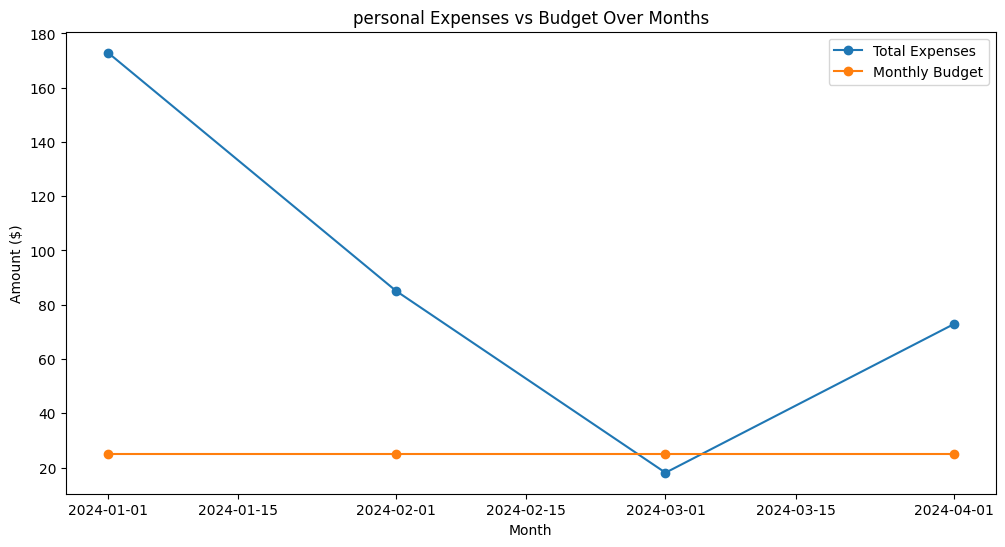

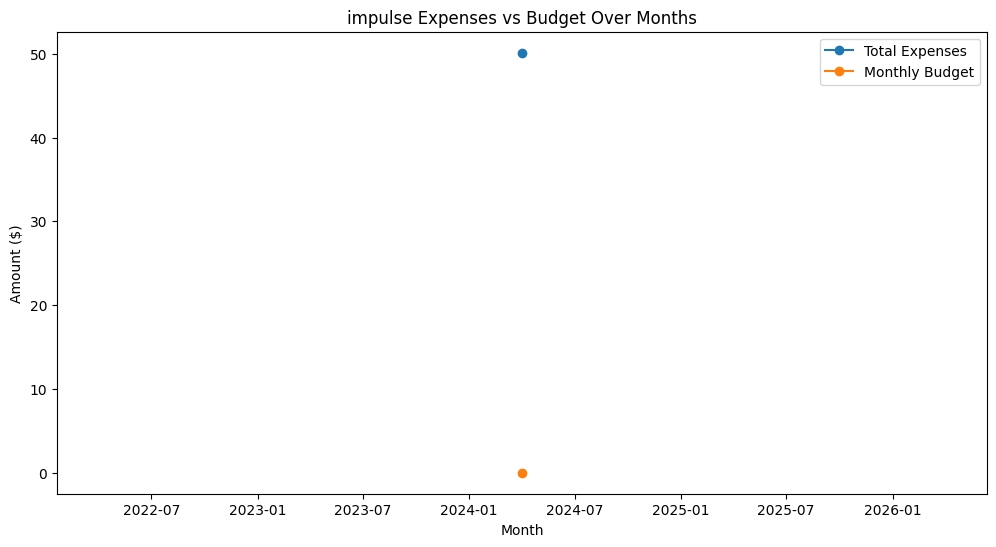

In [45]:
for cat in budget_vs_expenses.Category.unique():
    category = budget_vs_expenses[budget_vs_expenses['Category'] == cat]

    # visualize
    plt.figure(figsize=(12, 6))
    plt.plot(category['Date'], category['Total_Expenses'], marker='o', label='Total Expenses')
    plt.plot(category['Date'], category['Monthly_Budget'], marker='o', label='Monthly Budget')
    plt.title(f'{cat} Expenses vs Budget Over Months')
    plt.xlabel('Month')
    plt.ylabel('Amount ($)')
    plt.legend()
    plt.show()

In [46]:
# what is my personal expense on average
budget_vs_expenses[budget_vs_expenses['Category'] == 'personal']['Total_Expenses'].mean()

87.21000000000001

In [47]:
# what are the personal expenses in january 2024
personal_jan_2024 = df_merged[(df_merged['Category'] == 'personal') & (df_merged['Year'] == 2024) & (df_merged['Month'] == 1)]
personal_jan_2024

,Year,Month,Category,Budget,Name,Amt,Date
155,2024,1,personal,25,earphones,99.58,2024-01-30
156,2024,1,personal,25,gym membership,42.50,2024-01-29
157,2024,1,personal,25,haircut,30.80,2024-01-03


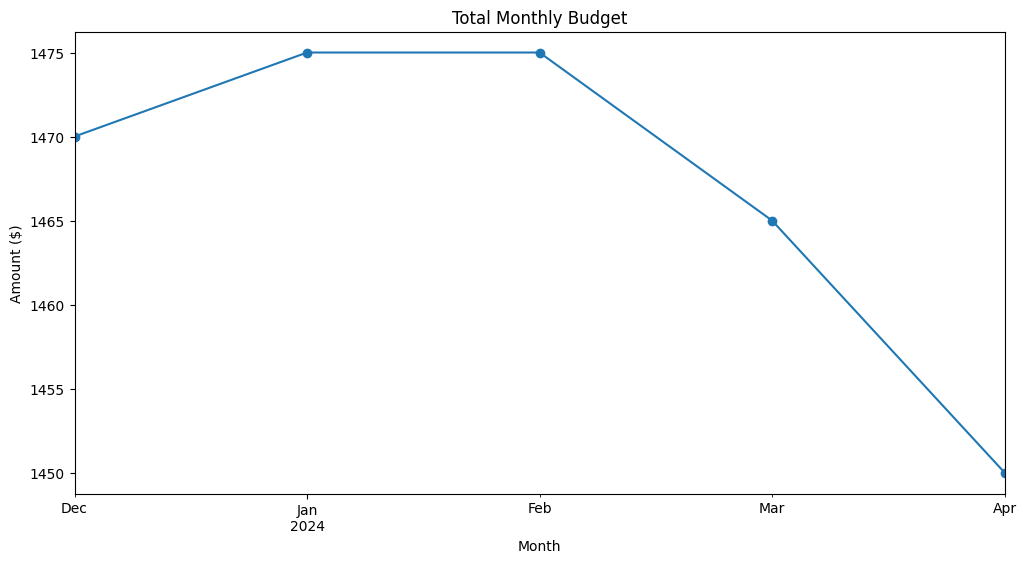

In [48]:
# visualize total monthly budget
plt.figure(figsize=(12, 6))
budget_vs_expenses.groupby('Date')['Monthly_Budget'].sum().plot(marker='o')
plt.title('Total Monthly Budget')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.show()

[Thank You](https://open.spotify.com/track/1e1JKLEDKP7hEQzJfNAgPl?si=39d25ab7e0be4e0a)